In [229]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as cdt
%matplotlib inline

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [230]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [231]:
train.shape,test.shape

((13730, 167), (4570, 43))

In [232]:
#pp.ProfileReport(test)

# Analise Exploratoria

In [233]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [234]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [236]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [237]:
test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,1426.000000,1426.000000,4570.000000,...,3458.000000,3400.000000,4570.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,31.029322,21.545295,2.176586,1.046827,1.767615,2.172867,1.357987,1.166199,2.286115,0.002188,...,528.615818,516.102471,0.609190,1.090000,118.988824,111.599118,106.130882,112.402941,76.376471,525.498235
std,9.901375,6.790798,0.996656,0.245769,0.871374,3.250585,0.567280,0.546511,0.721239,0.046732,...,73.278207,69.141624,0.487985,0.668384,29.067885,33.150519,33.553963,32.801291,43.295267,151.640060
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,479.525000,469.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,531.200000,521.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,580.975000,564.825000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,63.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,750.700000,730.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,960.000000


In [238]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 43 columns):
NU_INSCRICAO              4570 non-null object
CO_UF_RESIDENCIA          4570 non-null int64
SG_UF_RESIDENCIA          4570 non-null object
NU_IDADE                  4570 non-null int64
TP_SEXO                   4570 non-null object
TP_COR_RACA               4570 non-null int64
TP_NACIONALIDADE          4570 non-null int64
TP_ST_CONCLUSAO           4570 non-null int64
TP_ANO_CONCLUIU           4570 non-null int64
TP_ESCOLA                 4570 non-null int64
TP_ENSINO                 1426 non-null float64
TP_DEPENDENCIA_ADM_ESC    1426 non-null float64
IN_BAIXA_VISAO            4570 non-null int64
IN_CEGUEIRA               4570 non-null int64
IN_SURDEZ                 4570 non-null int64
IN_DISLEXIA               4570 non-null int64
IN_DISCALCULIA            4570 non-null int64
IN_SABATISTA              4570 non-null int64
IN_GESTANTE               4570 non-null int64
IN_IDOSO    

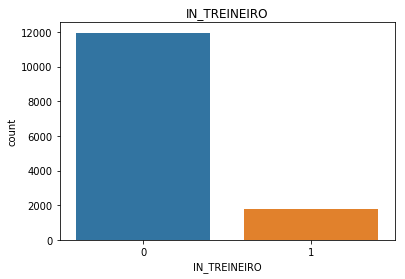

In [239]:
# Análise dos dados
sns.countplot(train['IN_TREINEIRO'])
plt.title('IN_TREINEIRO')
plt.show()

##### Remover dos dados de treino as features que não estão nos dados de teste

In [240]:
train = pd.concat([train['IN_TREINEIRO'], train[test.columns.tolist()]],axis=1)

####  Remover colunas com alto indice de missing values

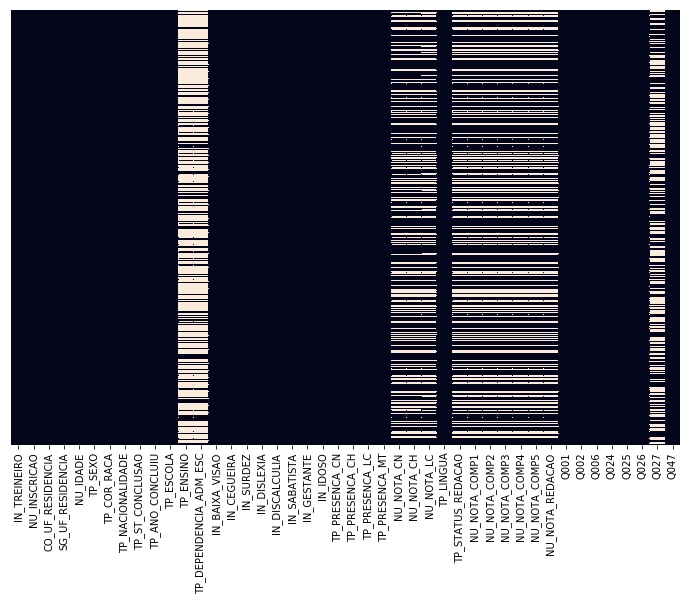

In [241]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(),yticklabels= False,cbar=False)

In [242]:
train.isnull().sum()

IN_TREINEIRO                 0
NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_

#### overview

In [243]:
pp.ProfileReport(train)

Number of variables,44
Number of observations,13730
Total Missing (%),8.1%
Total size in memory,4.6 MiB
Average record size in memory,352.0 B
Numeric,18
Categorical,10
Boolean,9
Date,0
Text (Unique),1
Rejected,6


#### Correlação

In [245]:
train.corr()['IN_TREINEIRO'].sort_values()

NU_IDADE                 -0.295091
TP_ANO_CONCLUIU          -0.257710
TP_ESCOLA                -0.244562
NU_NOTA_CH               -0.053460
NU_NOTA_CN               -0.037874
TP_LINGUA                -0.036395
CO_UF_RESIDENCIA         -0.034944
NU_NOTA_COMP3            -0.030147
NU_NOTA_LC               -0.028261
NU_NOTA_REDACAO          -0.026328
NU_NOTA_COMP4            -0.025958
NU_NOTA_COMP5            -0.025811
NU_NOTA_COMP2            -0.023308
TP_NACIONALIDADE         -0.015179
IN_BAIXA_VISAO           -0.013602
IN_GESTANTE              -0.011893
NU_NOTA_COMP1            -0.008709
IN_SURDEZ                -0.007374
IN_IDOSO                 -0.004663
IN_DISCALCULIA           -0.003297
IN_DISLEXIA              -0.003297
IN_SABATISTA              0.003824
TP_STATUS_REDACAO         0.006688
TP_COR_RACA               0.009676
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
TP_PRESENCA_CH            0.094692
TP_PRESENCA_CN            0.094692
TP_ST_CONCLUSAO     

#### tentar traçar o perfil dos treineiros
    - https://www.educamaisbrasil.com.br/educacao/enem/treineiros-enem-saiba-quem-sao-e-como-funciona-essa-modalidade
    - Sem limite de renda ou idade para participar, muitos que ainda não concluíram a educação básica, fazem o Enem para treinar e sentir como é a prova, como os assuntos são abordados e o grau de dificuldade. O Ministério da Educação (MEC) permite que estudantes do primeiro e segundo ano façam o exame para autoavaliar os conhecimentos. O perfil dos “treineiros” são participantes menores de 18 anos e que não concluíram o ensino médio.
    -TP_ST_CONCLUSAO = 3 = >  Estou cursando e concluirei o Ensino Médio após 2016
    -TP_ST_CONCLUSAO = 4 = >  Não concluí e não estou cursando o Ensino Médio

In [246]:
train[train['IN_TREINEIRO']==1].describe()

,IN_TREINEIRO,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,1783.0,1783.000000,1783.000000,1783.000000,1783.000000,1783.0,1783.0,1783.0,0.0,0.0,...,1532.000000,1505.000000,1783.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,1.0,29.844644,16.213685,2.210881,1.038699,3.0,0.0,1.0,NaN,NaN,...,520.210444,511.825249,0.547392,1.112957,119.189369,110.033223,104.345515,111.043189,74.710963,519.322259
std,0.0,9.744087,0.754183,1.036026,0.217539,0.0,0.0,0.0,NaN,NaN,...,70.872867,67.616087,0.497889,0.730599,30.143838,32.666292,32.616203,32.371495,41.214115,148.876351
min,1.0,11.000000,13.000000,0.000000,0.000000,3.0,0.0,1.0,NaN,NaN,...,326.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,23.000000,16.000000,1.000000,1.000000,3.0,0.0,1.0,NaN,NaN,...,470.750000,462.000000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,460.000000
50%,1.0,29.000000,16.000000,3.000000,1.000000,3.0,0.0,1.0,NaN,NaN,...,523.750000,516.000000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,1.0,35.000000,17.000000,3.000000,1.000000,3.0,0.0,1.0,NaN,NaN,...,571.125000,560.500000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,1.0,53.000000,18.000000,5.000000,4.000000,3.0,0.0,1.0,NaN,NaN,...,711.900000,718.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [247]:
train[train['IN_TREINEIRO']==0].describe()

,IN_TREINEIRO,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,11947.0,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,4282.000000,4282.000000,...,8809.000000,8628.000000,11947.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000
mean,0.0,30.869842,22.396752,2.181887,1.050389,1.600988,2.466477,1.406294,1.178888,2.259692,...,531.304677,517.283530,0.600569,1.099791,119.920260,112.244321,107.256606,113.486903,77.836694,530.744784
std,0.0,9.873436,7.208893,1.002916,0.264487,0.798296,3.332580,0.580520,0.565490,0.698586,...,74.092335,68.845225,0.489802,0.694668,29.794192,33.912130,34.617106,33.658310,43.367837,155.166472
min,0.0,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,23.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,...,482.000000,469.300000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,0.0,31.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,533.300000,521.550000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,0.0,35.000000,24.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,...,583.000000,565.800000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,120.000000,600.000000
max,0.0,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,...,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [248]:
train = train[['IN_TREINEIRO','NU_IDADE','TP_ST_CONCLUSAO']]
test = test[['NU_IDADE','TP_ST_CONCLUSAO']]

In [249]:
train.TP_ST_CONCLUSAO.value_counts(), test.TP_ST_CONCLUSAO.value_counts()

(1    6524
 2    4283
 3    2306
 4     617
 Name: TP_ST_CONCLUSAO, dtype: int64, 1    2198
 2    1427
 3     754
 4     191
 Name: TP_ST_CONCLUSAO, dtype: int64)

# Preprocessamento

In [250]:
train1 = train.copy()
test1 = test.copy()

In [251]:
features = train1.drop(['IN_TREINEIRO'],axis=1)
target_final = train1['IN_TREINEIRO']

In [252]:
colunas = train1.drop(['IN_TREINEIRO'],axis=1).columns.tolist()

In [254]:
# com MinMaxScaler () teve resultado pior que que StandarScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#features_minmax = pd.DataFrame(data=df_train)
features[colunas] = scaler.fit_transform(features[colunas])
test1[colunas] = scaler.fit_transform(test1[colunas])

display(features.head())

,NU_IDADE,TP_ST_CONCLUSAO
0,0.341624,-0.888684
1,-0.652215,0.246774
2,-0.084307,1.382232
3,0.483601,-0.888684
4,0.909531,-0.888684


#### Dados desbalanceados
     - Apesar do dados estarem bem balanceados, o modelo teve melhor performance sem o balanceamento.

##### Separar dados em treino e teste

In [276]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

#### Criação dos modelos

In [277]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [278]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 99.06
Accuracy CV 10-Fold: 99.06


In [279]:
#Light GBM Classifier
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)

Accuracy: 99.7
Accuracy CV 10-Fold: 99.7


In [280]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','Light GBM'],
    'Score': [ 
        acc_cv_log,
        acc_cv_lgbm
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Light GBM,99.70
0,Logistic Regression,99.06


## MODELO Light GBM

#### tunning
#https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html

In [281]:
from skopt import dummy_minimize
from skopt.space import Real, Integer

def treinar_modelo(params):
    mdl = LGBMClassifier(
                         random_state=0 ,
                         n_estimators=1000)
    mdl.fit(X_train, y_train)
    
    p = mdl.predict(X_val)
    
    return metrics.accuracy_score(y_val, p)

space  = [Integer(2, 128, name='num_leaves'),
          Real(1e-3, 1e-1, "log-uniform", name='learning_rate'),
          Integer(1, 100, name='min_child_samples'),
          Real(0.05, 1.0, name='subsample'),
          Real(0.1, 1.0, name='colsample_bytree')]

resultado = dummy_minimize(treinar_modelo, space, random_state=0, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3416
Function value obtained: 0.9971
Current minimum: 0.9971
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3331
Function value obtained: 0.9971
Current minimum: 0.9971
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3261
Function value obtained: 0.9971
Current minimum: 0.9971
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3580
Function value obtained: 0.9971
Current minimum: 0.9971
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3191
Function value obtained: 0.9971
Current minimum: 0.9971
Iteration No: 6 started. Evaluating

In [282]:
resultado.x

[49, 0.026938830192854108, 68, 0.8650483367416191, 0.862526564905713]

#### modelo tunnado

In [283]:
mdl = LGBMClassifier(num_leaves = 49,
          learning_rate= 0.0260,
          min_child_samples = 68,
          subsample = 0.865,
          colsample_bytree= 0.862,
          random_state=0,
          n_estimators=1000)

mdl.fit(X_train, y_train)
    
pred = mdl.predict(X_val)
    
metrics.accuracy_score(y_val, pred)

0.9970866715222141

In [284]:
confusion_matrix(y_val,pred)

array([[2395,    0],
       [   8,  343]], dtype=int64)

##### DF para CSV

##### Preparando os dados do test.csv

In [285]:
t = pd.read_csv('test.csv')

In [286]:
y_pred = mdl.predict(test1)

In [287]:
resultado = pd.DataFrame(t['NU_INSCRICAO'])
resultado= resultado.reset_index(drop=True)
resultado['IN_TREINEIRO'] = ' '
for i, val in enumerate(y_pred):
    resultado['IN_TREINEIRO'][i] = format(val, '.1f')

In [288]:
resultado

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0.0
1,177f281c68fa032aedbd842a745da68490926cd2,0.0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1.0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0.0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0.0
5,3f28749fb79fb059caf5aed79625a5addfd7a91a,0.0
6,bb2a0edddf3c59181a1496390aaaee7f32624d9d,1.0
7,cc7cab347fe5455aae983f3701ca40f84dc01949,0.0
8,95e9338f1da02f7bfa0e3194130afdccc0fb5457,1.0
9,155f84f2ee5b34e658f2adcc70f2ec83e37040cb,0.0


In [228]:
resultado.to_csv('answer.csv',index=False)